In [1]:
import numpy as np
import qutip
import matplotlib.pyplot as plt

## N = 1

In [2]:
def get_h_effective(omegaS, gamma):
    HS = omegaS * qutip.sigmax()
    HM = -1j * gamma * (qutip.qeye(2) - qutip.sigmaz()) / 2 / 2

    return HS + HM

In [3]:
omegaS = 1
LMBD = 3
dlmbd = .01
lmbd_list = np.arange(0, LMBD + dlmbd, dlmbd)


H_eff_list = []
for lmbd in lmbd_list:
    gamma = 4 * omegaS * lmbd
    H_eff_list.append(get_h_effective(omegaS, gamma))

In [4]:
eigvals = np.empty( (len(lmbd_list), 2) , dtype=np.complex128)
for i, H in enumerate(H_eff_list):
    eigvals[i] = np.linalg.eigvals(H.full())

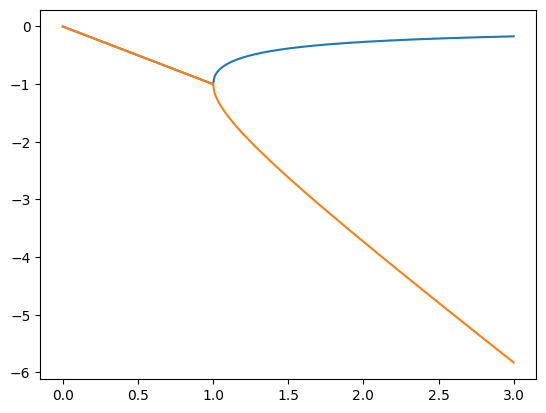

In [5]:
plt.figure()

# plt.loglog(lmbd_list, -eigvals.imag)
plt.plot(lmbd_list, eigvals.imag)

# N = 2

In [6]:
omegaS = 1
LMBD = 3
# dlmbd = .2
NLMBD = 301
lmbd_1_list = np.linspace(0, LMBD, NLMBD)
lmbd_2_list = np.linspace(0, LMBD, NLMBD)

In [7]:
def get_h_effective_2(omegaS, gamma_2, gamma_1):
    Ns = 2 # Legacy of copy/pasted code.
    HS = omegaS * qutip.tensor([qutip.sigmax()] + (Ns-1)*[qutip.qeye(2)])
    for i in range(1, Ns):
        padding_l = i * [qutip.qeye(2)]
        padding_r = (Ns-i-1) * [qutip.qeye(2)]
        HS += omegaS * qutip.tensor(padding_l + [qutip.sigmax()] + padding_r)

    I2 = qutip.qeye(2)
    spin1 = qutip.basis(2, 1)
    E1_1 = (I2 - qutip.sigmaz()) / 2
    HM_1_l = -1j * gamma_1 *  qutip.tensor(E1_1, I2) / 2
    HM_1_r = -1j * gamma_1 *  qutip.tensor(I2, E1_1) / 2
    HM_2 = -1j * gamma_2 * qutip.tensor(Ns * [spin1]) * qutip.tensor(Ns * [spin1]).dag() / 2
    
    return HS + HM_2 + HM_1_l + HM_1_r

In [8]:
H_eff_2_list = []

for lmbd_2 in lmbd_2_list:
    gamma_2 = 4 * omegaS * lmbd_2
    l = []
    for lmbd_1 in lmbd_1_list:
        gamma_1 = 4 * omegaS * lmbd_1
        l.append(get_h_effective_2(omegaS, gamma_2, gamma_1))
    H_eff_2_list.append(l)

In [9]:
eigvals_2 = np.empty( (len(lmbd_2_list), len(lmbd_1_list), 4) , dtype=np.complex128)
eigenve_2 = []
for i, lmbd_2 in enumerate(lmbd_2_list):
    eive = []
    for j, lmbd_1 in enumerate(lmbd_1_list):
        eigvals_2[i, j] = H_eff_2_list[i][j].eigenenergies()
        eive.append(H_eff_2_list[i][j].eigenstates())
    eigenve_2.append(eive)
        

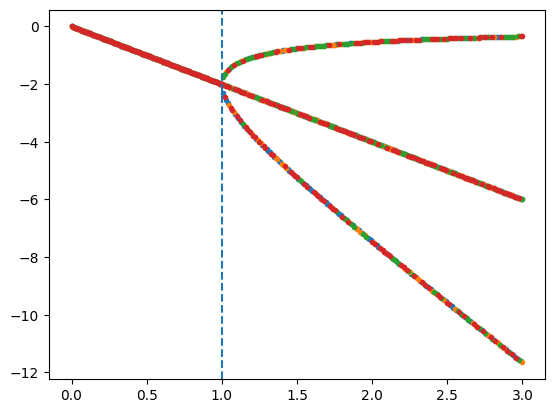

In [10]:
plt.figure()

plt.plot(lmbd_1_list, eigvals_2[0].imag, '.')

plt.axvline(1, ls='--')

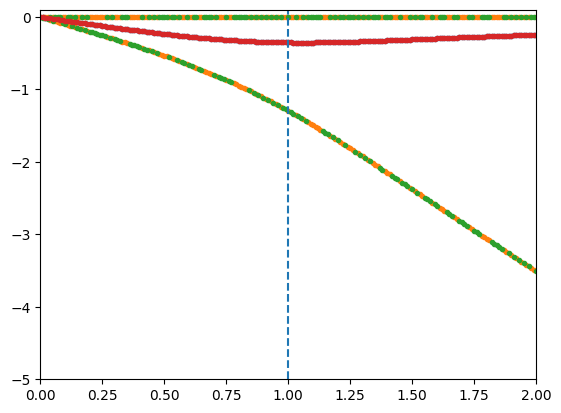

In [11]:
plt.figure()

plt.plot(lmbd_2_list, eigvals_2[:,0].imag, '.')
plt.xlim( (0, 2) )
plt.ylim( (-5, .1) )
plt.axvline(1, ls='--')

In [12]:
evals = []
evecs = []
for i, lmbd_2 in enumerate(lmbd_2_list):
    evals.append(H_eff_2_list[10][i].eigenenergies().imag)
    evecs.append(H_eff_2_list[10][i].eigenstates())

(-3.0, 0.1)

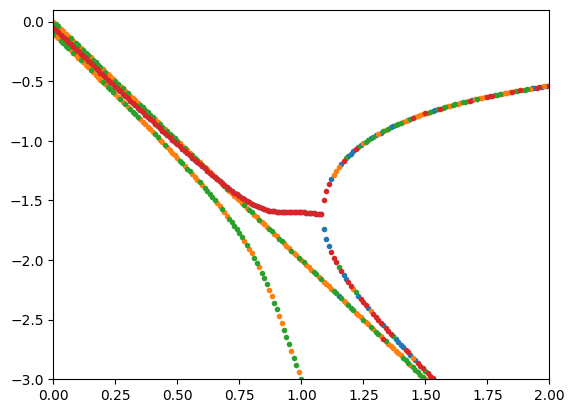

In [13]:
plt.figure()
plt.plot(lmbd_2_list, evals, ".")
plt.xlim( (0, 2) )
plt.ylim ( (-3, .1) )

In [14]:
evecs[20]

(array([-1.93594075e+00-0.4466673j,  1.23259516e-32-0.4j      ,
         4.46844608e-16-0.5066654j,  1.93594075e+00-0.4466673j]),
 array([Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.50332167+0.j        ]
         [-0.48720046-0.11240866j]
         [-0.48720046-0.11240866j]
         [ 0.43462376+0.24035284j]]                                                 ,
        Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[-8.50490663e-31]
         [ 7.07106781e-01]
         [-7.07106781e-01]
         [ 7.27231147e-31]]                                                         ,
        Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[-6.76799960e-01+6.10622664e-16j]
         [ 1.38777878e-16+1.71455562e-01j]
         [ 1.04083409e-16+1.71455562e-01j]
         [ 6.95088336e-01+0.00000000e+00j]]                         

In [15]:
lmbd_2_list[20]

np.float64(0.2)

In [16]:
evecs[20][1][0].ptrace(0)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.5033327 +0.j         -0.48398519+0.12482226j]
 [-0.48398519-0.12482226j  0.4966673 +0.j        ]]

In [17]:
evecs[20][1][3].ptrace(0)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5033327 +0.j         0.48398519+0.12482226j]
 [0.48398519-0.12482226j 0.4966673 +0.j        ]]

In [18]:
def state_to_theta(rho):
    y = 2 * rho[1, 0].imag
    z = (rho[0, 0] - rho[1, 1]).real
    theta = np.arctan2(y, z)
    
    return theta

In [19]:
theta1 = state_to_theta(evecs[20][1][0].ptrace(0))

In [20]:
theta2 = state_to_theta(evecs[20][1][3].ptrace(0))

In [21]:
theta1

np.float64(-1.5441030915647973)

In [22]:
theta2

np.float64(-1.5441030915648)

In [23]:
H_eff_2 = get_h_effective_2(1, 4*3, 0)

In [24]:
eigens = H_eff_2.eigenstates()

In [25]:
e0 = eigens[1][0]
e1 = eigens[1][-1]

In [26]:
eigens

(array([-1.44555594e+00-0.16609415j,  0.00000000e+00+0.j        ,
         5.14447302e-17-5.6678117j ,  1.44555594e+00-0.16609415j]),
 array([Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.6872537 +0.j        ]
         [-0.49673183-0.05707441j]
         [-0.49673183-0.05707441j]
         [ 0.02132023+0.1650085j ]]                                                 ,
        Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.        ]
         [ 0.70710678]
         [-0.70710678]
         [ 0.        ]]                                                             ,
        Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[-5.69640692e-02+9.51245388e-17j]
         [ 5.73107455e-18+1.61430809e-01j]
         [ 3.05934305e-17+1.61430809e-01j]
         [ 9.71923496e-01+0.00000000e+00j]]                                 

In [27]:
e0

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.6872537 +0.j        ]
 [-0.49673183-0.05707441j]
 [-0.49673183-0.05707441j]
 [ 0.02132023+0.1650085j ]]

In [28]:
e1

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.6872537 +0.j        ]
 [0.49673183-0.05707441j]
 [0.49673183-0.05707441j]
 [0.02132023-0.1650085j ]]

In [29]:
dtheta = np.pi/49
thetas = np.arange(0, np.pi+dtheta, dtheta)
dphi = 2*np.pi/49
phis = np.arange(0, 2*np.pi+dtheta, dphi)

In [30]:
sub_p_space = []
for t in thetas:
    for p in phis:
        state = np.cos(t/2)*e0 + np.exp(1j*p)*np.sin(p/2)*e1
        sub_p_space.append(state.ptrace(0))

In [31]:
def state_to_polar(rho):
    y = 2 * rho[1, 0].imag
    z = (rho[0, 0] - rho[1, 1]).real
    r = np.sqrt(y**2 + z**2)
    theta = np.arctan2(y, z)

    return r, theta

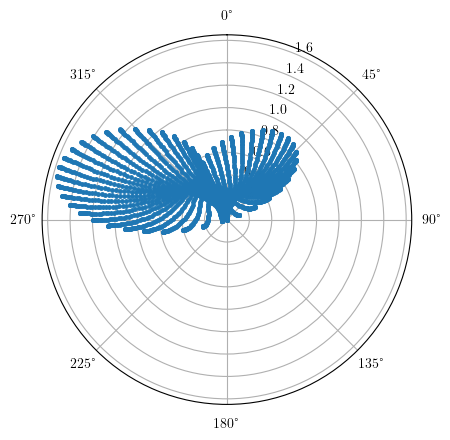

In [32]:
plt.style.use(["../config/stylelib/thesis.mplstyle"])

r_all = np.empty(len(sub_p_space))
theta_all = np.empty(len(sub_p_space))

for i, pstate in enumerate(sub_p_space):
    r_all[i], theta_all[i] = state_to_polar(pstate)

plt.figure()

plt.polar(theta_all, r_all, ".")

plt.gca().set_theta_direction(-1)
plt.gca().set_theta_zero_location('N')

In [33]:
eigvals_2[0,0].imag

array([0., 0., 0., 0.])

In [34]:
max_eiva_imag = np.zeros( (NLMBD, NLMBD) )
for i, row in enumerate(eigvals_2):
    for j, eiv in enumerate(row):
        max_eiva_imag[i, j] = (eiv.imag).max()

In [35]:
max_eiva_imag

array([[ 0.        , -0.02      , -0.04      , ..., -0.34558997,
        -0.34436339, -0.34314575],
       [ 0.        , -0.02      , -0.04      , ..., -0.34560888,
        -0.34438203, -0.34316412],
       [ 0.        , -0.02      , -0.04      , ..., -0.34562773,
        -0.3444006 , -0.34318243],
       ...,
       [ 0.        , -0.02      , -0.04      , ..., -0.34936181,
        -0.34808436, -0.34681672],
       [ 0.        , -0.02      , -0.04      , ..., -0.34937026,
        -0.3480927 , -0.34682496],
       [ 0.        , -0.02      , -0.04      , ..., -0.34937868,
        -0.34810102, -0.34683318]])

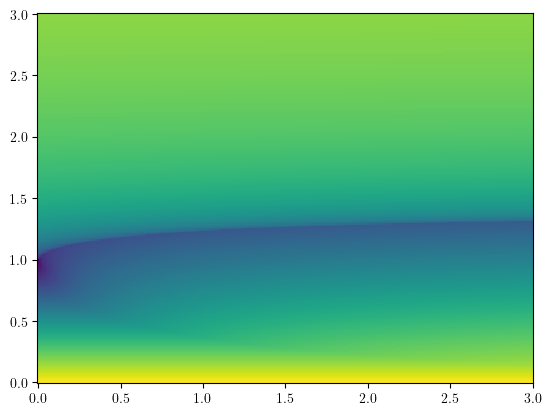

In [36]:
plt.pcolormesh(lmbd_2_list, lmbd_1_list, max_eiva_imag.T)

(-4.0, 0.0)

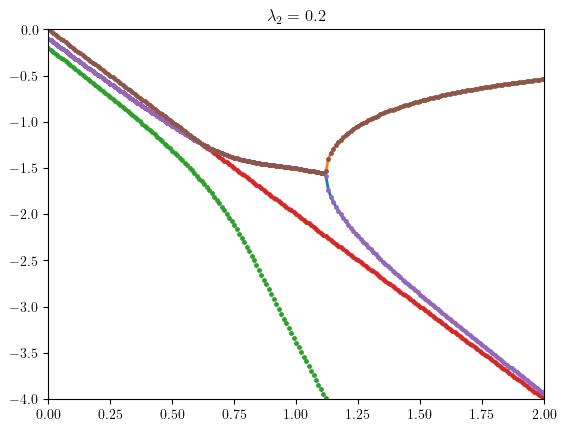

In [60]:
n = 20
plt.plot(lmbd_1_list, max_eiva_imag[n])
plt.plot(lmbd_1_list, eigvals_2[n].imag,
         ".")
plt.title(rf"$\lambda_2={lmbd_2_list[n]}$")
plt.xlim( (0, 2) )
plt.ylim( (-4, 0) )

In [38]:
stage_boundary = np.empty(max_eiva_imag.shape[0])
for i, row in enumerate(max_eiva_imag):
    stage_boundary[i] = lmbd_1_list[np.argmin(row)]

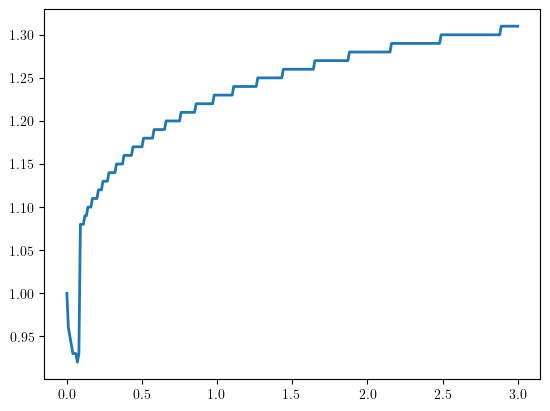

In [39]:
plt.plot(lmbd_2_list, stage_boundary)

~~Do it again by matching the left and right derivative.~~
Degeneracy breaking is enough

In [40]:
max_eiva_imag = np.zeros( (NLMBD, NLMBD, 2) )
for i, row in enumerate(eigvals_2):
    for j, eiv in enumerate(row):
        sorted_eiv = eiv.imag
        sorted_eiv.sort()
        max_eiva_imag[i, j] = sorted_eiv[-2:]

In [46]:
max_eiva_imag[0, 0]

array([0., 0.])

In [51]:
threshold = 10**-6
stage_boundary = np.empty(max_eiva_imag.shape[0])
for i, row in enumerate(max_eiva_imag):
    for j, eig in enumerate(row[90:]):
        print(i, eig)
        if np.abs(eig[0] - eig[1]) > threshold:
            print(np.abs(eig[0] - eig[1]))
            stage_boundary[i] = lmbd_1_list[90+j]
            break

0 [0. 0.]
0 [-0.02 -0.02]
0 [-0.04 -0.04]
0 [-0.06 -0.06]
0 [-0.08 -0.08]
0 [-0.1 -0.1]
0 [-0.12 -0.12]
0 [-0.14 -0.14]
0 [-0.16 -0.16]
0 [-0.18 -0.18]
0 [-0.2 -0.2]
0 [-0.22 -0.22]
0 [-0.24 -0.24]
0 [-0.26 -0.26]
0 [-0.28 -0.28]
0 [-0.3 -0.3]
0 [-0.32 -0.32]
0 [-0.34 -0.34]
0 [-0.36 -0.36]
0 [-0.38 -0.38]
0 [-0.4 -0.4]
0 [-0.42 -0.42]
0 [-0.44 -0.44]
0 [-0.46 -0.46]
0 [-0.48 -0.48]
0 [-0.5 -0.5]
0 [-0.52 -0.52]
0 [-0.54 -0.54]
0 [-0.56 -0.56]
0 [-0.58 -0.58]
0 [-0.6 -0.6]
0 [-0.62 -0.62]
0 [-0.64 -0.64]
0 [-0.66 -0.66]
0 [-0.68 -0.68]
0 [-0.7 -0.7]
0 [-0.72 -0.72]
0 [-0.74 -0.74]
0 [-0.76 -0.76]
0 [-0.78 -0.78]
0 [-0.8 -0.8]
0 [-0.82 -0.82]
0 [-0.84 -0.84]
0 [-0.86 -0.86]
0 [-0.88 -0.88]
0 [-0.9 -0.9]
0 [-0.92 -0.92]
0 [-0.94 -0.94]
0 [-0.96 -0.96]
0 [-0.98 -0.98]
0 [-1. -1.]
0 [-1.02 -1.02]
0 [-1.04 -1.04]
0 [-1.06 -1.06]
0 [-1.08 -1.08]
0 [-1.1 -1.1]
0 [-1.12 -1.12]
0 [-1.14 -1.14]
0 [-1.16 -1.16]
0 [-1.18 -1.18]
0 [-1.2 -1.2]
0 [-1.22 -1.22]
0 [-1.24 -1.24]
0 [-1.26 -1.26]
0 [-1.28

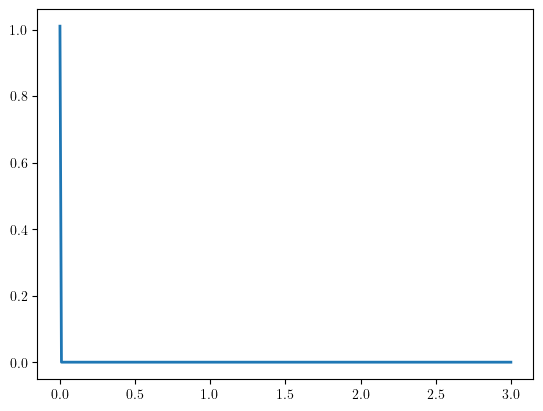

In [52]:
plt.plot(lmbd_2_list, stage_boundary)

In [53]:
stage_boundary

array([1.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [45]:
max_eiva_imag[1][:100]

array([[-0.00499987,  0.        ],
       [-0.02499887, -0.02      ],
       [-0.04499687, -0.04      ],
       [-0.06499387, -0.06      ],
       [-0.08498985, -0.08      ],
       [-0.10498483, -0.1       ],
       [-0.12497879, -0.12      ],
       [-0.14497172, -0.14      ],
       [-0.16496361, -0.16      ],
       [-0.18495446, -0.18      ],
       [-0.20494426, -0.2       ],
       [-0.22493299, -0.22      ],
       [-0.24492063, -0.24      ],
       [-0.26490718, -0.26      ],
       [-0.28489262, -0.28      ],
       [-0.30487692, -0.3       ],
       [-0.32486007, -0.32      ],
       [-0.34484204, -0.34      ],
       [-0.36482281, -0.36      ],
       [-0.38480236, -0.38      ],
       [-0.40478066, -0.4       ],
       [-0.42475767, -0.42      ],
       [-0.44473338, -0.44      ],
       [-0.46470774, -0.46      ],
       [-0.48468071, -0.48      ],
       [-0.50465226, -0.5       ],
       [-0.52462236, -0.52      ],
       [-0.54459094, -0.54      ],
       [-0.56455797,